In [8]:
#pip install scipy

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [10]:
# Define image size and batch size
IMG_HEIGHT = 24
IMG_WIDTH = 24
BATCH_SIZE = 32

# ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the train and test datasets
train_dir = 'dataset_new/train'
test_dir = 'dataset_new/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               batch_size=BATCH_SIZE,
                                               color_mode='grayscale',
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                             batch_size=BATCH_SIZE,
                                             color_mode='grayscale',
                                             class_mode='categorical')


Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [11]:
# Define a Sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,642 (143.13 KB)

 Trainable params: 36,642 (143.13 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(train_data, epochs=15, validation_data=test_data)

# Save the trained model
model.save('models/drowsiness_detection_model.keras')


Epoch 1/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.4918 - loss: 0.6924 - val_accuracy: 0.7110 - val_loss: 0.6706
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.6510 - loss: 0.6548 - val_accuracy: 0.8257 - val_loss: 0.4221
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.7759 - loss: 0.5108 - val_accuracy: 0.8578 - val_loss: 0.4017
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.8256 - loss: 0.4229 - val_accuracy: 0.7936 - val_loss: 0.5387
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.8213 - loss: 0.3911 - val_accuracy: 0.8211 - val_loss: 0.4928
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.8797 - loss: 0.3083 - val_accuracy: 0.8807 - val_loss: 0.3246
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.8689 - loss: 0.3208 - val_accuracy: 0.8945 - val_loss: 0.2673
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.8785 - loss: 0.3282 - val_accuracy: 0.

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

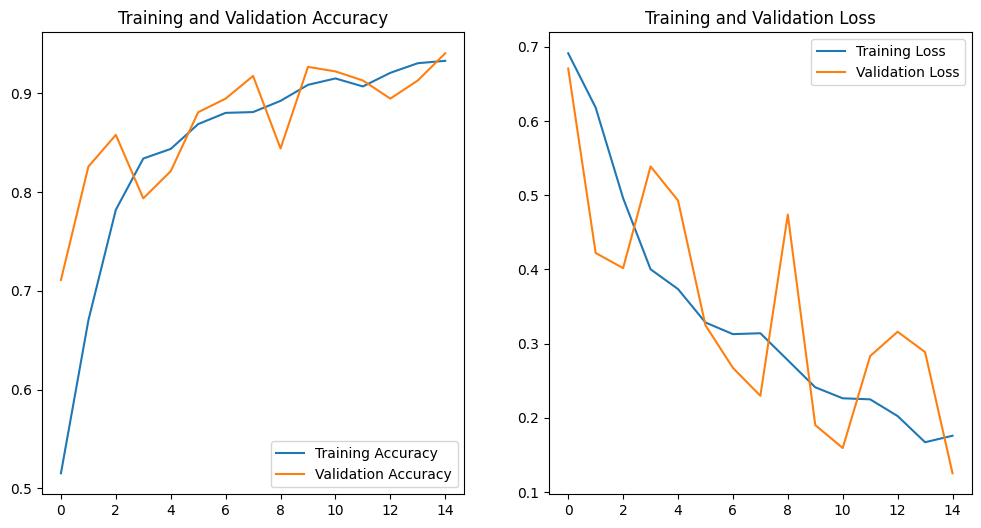

In [16]:
# Plot accuracy and loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [17]:
# Load the model
from tensorflow.keras.models import load_model

model = load_model('models\drowsiness_detection_model.keras')

# Test the model on unseen data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_9168\275728409.py:4: SyntaxWarning: invalid escape sequence '\d'
  model = load_model('models\drowsiness_detection_model.keras')


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.9257 - loss: 0.1589
Test accuracy: 0.94
Test loss: 0.13
